#1.전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info()     # 데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['age'] = (df['age'] / 365).astype(int)  #일수를 년수로 바꿔서 덮어쓰기
df['age']

,age
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [ ]:
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)] #이상치 제거
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]
df = df[(df['height'] > 100) & (df['height'] < 250)]
df = df[(df['weight'] > 30) & (df['weight'] < 250)]

In [ ]:
df['BMI'] = df['weight'] / ( (df['height'] / 100) ** 2 ) #BMI 추가

In [ ]:
print(df.shape)

(68736, 14)


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


#2.학습

In [ ]:
#변수 중요도 확인
#변수 정의하기
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',"BMI"]]
y = df['cardio']

#상수항 b0추가
X = sm.add_constant(X)

#로지스틱 회귀 (cardio가 0 또는 1 이므로)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())
#ap_hi이 영향력이 가장 심하고, age, 높은 콜레스테롤도 관련 있음

Optimization terminated successfully.
         Current function value: 0.561039
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                68736
Model:                          Logit   Df Residuals:                    68723
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Aug 2025   Pseudo R-squ.:                  0.1905
Time:                        15:04:21   Log-Likelihood:                -38564.
converged:                       True   LL-Null:                       -47641.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.1161      0.765    -13.221      0.000     -11.616      -8.616
age             0.0514    

In [ ]:
# 학습을 위한 feature 선택 및 분할
#다중공선성(multicollinearity) 문제와 모델 간결성 때문에 weight와 height 제거
features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI'] #유의한 변수만 추리기
X = df[features]
y = df['cardio']

# 학습/테스트 데이터 분할 (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_log = LogisticRegression(max_iter=1000,random_state=42) #학습
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#3.평가

In [ ]:
pred = model_log.predict(X_test) #평가
mae = mean_absolute_error(y_test, pred)
mae

0.27727669479196976

In [ ]:
# 예측값 생성
pred = model_log.predict(X_test)

# classification_report 출력
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.7227233052080303
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6891
           1       0.75      0.67      0.71      6857

    accuracy                           0.72     13748
   macro avg       0.73      0.72      0.72     13748
weighted avg       0.73      0.72      0.72     13748



In [ ]:
model_log.score(X_test, y_test)

0.7227233052080303

In [ ]:
confusion_matrix(y_test, model_log.predict(X_test))

array([[5336, 1555],
       [2257, 4600]])

In [ ]:
f1 = f1_score(y_test, pred)
print("F1 Score:", f1)

F1 Score: 0.7070396557024285


#4.회귀 말고 다른 모델 공부하고 돌려보기
5월 7일

In [ ]:
# 학습을 위한 feature 선택 및 분할

features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI'] #유의한 변수만 추리기
X = df[features]
y = df['cardio']

# 학습/테스트 데이터 분할 (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\n[Random Forest] 성능 평가")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



[Random Forest] 성능 평가
Accuracy: 0.6908641256910096
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6891
           1       0.69      0.69      0.69      6857

    accuracy                           0.69     13748
   macro avg       0.69      0.69      0.69     13748
weighted avg       0.69      0.69      0.69     13748



In [ ]:
model_rf.score(X_test, y_test)

0.6908641256910096

In [ ]:
confusion_matrix(y_test, model_rf.predict(X_test))

array([[4757, 2134],
       [2116, 4741]])

In [ ]:
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

F1 Score: 0.6905039324206234


In [ ]:
# 2. LightGBM
model_lgb = LGBMClassifier(random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
print("\n[LightGBM] 성능 평가")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 27163, number of negative: 27825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 54988, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493981 -> initscore=-0.024079
[LightGBM] [Info] Start training from score -0.024079

[LightGBM] 성능 평가
Accuracy: 0.7323247017748036
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6891
           1       0.75      0.70      0.72      6857

    accuracy                           0.73     13748
   macro avg       0.73      0.73      0.73     13748
weighted avg       0.73      0.73      0.73     13748



In [ ]:
model_lgb.score(X_test, y_test)

0.7323247017748036

In [ ]:
confusion_matrix(y_test, model_lgb.predict(X_test))

array([[5294, 1597],
       [2083, 4774]])

In [ ]:
f1 = f1_score(y_test, y_pred_lgb)
print("F1 Score:", f1)

F1 Score: 0.7218022376776535


In [ ]:
# 3. XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("\n[XGBoost] 성능 평가")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:29:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[XGBoost] 성능 평가
Accuracy: 0.7291242362525459
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6891
           1       0.75      0.69      0.72      6857

    accuracy                           0.73     13748
   macro avg       0.73      0.73      0.73     13748
weighted avg       0.73      0.73      0.73     13748



In [ ]:
model_xgb.score(X_test, y_test)

0.7291242362525459

In [ ]:
confusion_matrix(y_test, model_xgb.predict(X_test))

array([[5262, 1629],
       [2095, 4762]])

In [ ]:
f1 = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1)

F1 Score: 0.7189009661835749


In [ ]:
# 4. Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("\n[Gradient Boosting] 성능 평가")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


[Gradient Boosting] 성능 평가
Accuracy: 0.7329066045970323
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6891
           1       0.75      0.70      0.72      6857

    accuracy                           0.73     13748
   macro avg       0.73      0.73      0.73     13748
weighted avg       0.73      0.73      0.73     13748



In [ ]:
model_gb.score(X_test, y_test)

0.7329066045970323

In [ ]:
confusion_matrix(y_test, model_gb.predict(X_test))

array([[5306, 1585],
       [2087, 4770]])

In [ ]:
f1 = f1_score(y_test, y_pred_gb)
print("F1 Score:", f1)

F1 Score: 0.7220708446866485


#5.심혈관계 데이터 분석 및 결과 시각화 등등 자율 분석

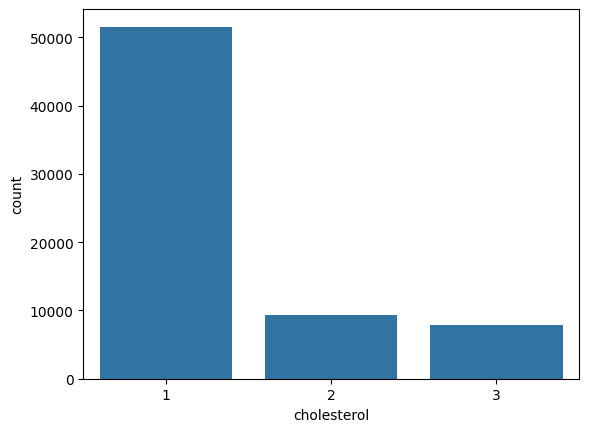

In [ ]:
sns.countplot(x='cholesterol',data=df) #콜레스트롤 별 발병
plt.show()

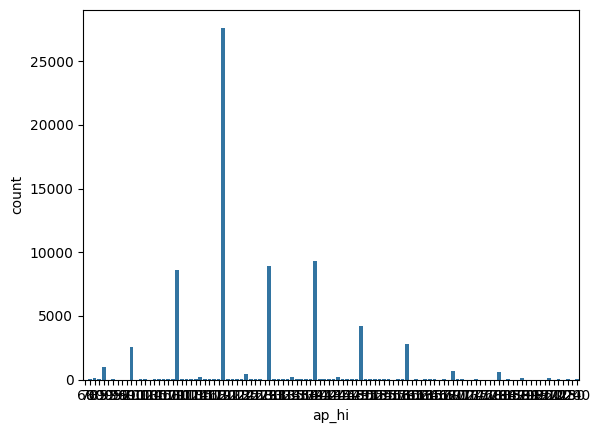

In [ ]:
sns.countplot(x='ap_hi', data=df)
plt.show()

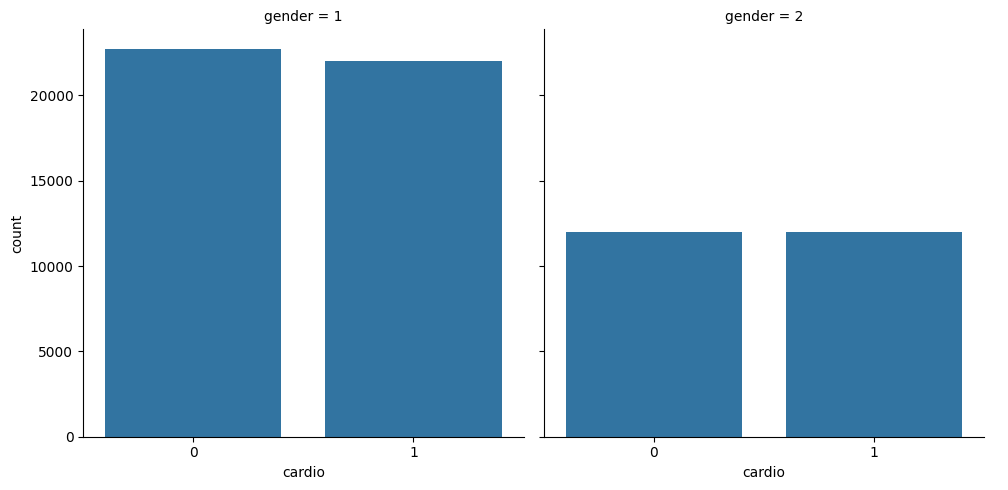

In [ ]:
sns.catplot(x='cardio', col='gender', kind='count', data=df) #성별 별 발병 (0이 정상, 1이 여자)

In [ ]:
df.groupby(['cholesterol']).cardio.sum() #해당 콜레스테롤 수준에서 심장병이 있는 사람 수

,cardio
cholesterol,
1,22453
2,5553
3,6014


In [ ]:
#비율 계산
print(df[df.cholesterol == 1].cardio.sum()/df[df.cholesterol == 1].cardio.count())
print(df[df.cholesterol == 2].cardio.sum()/df[df.cholesterol == 2].cardio.count())
print(df[df.cholesterol == 3].cardio.sum()/df[df.cholesterol == 3].cardio.count())

0.4356168635896242
0.5964554242749731
0.7629075225168083


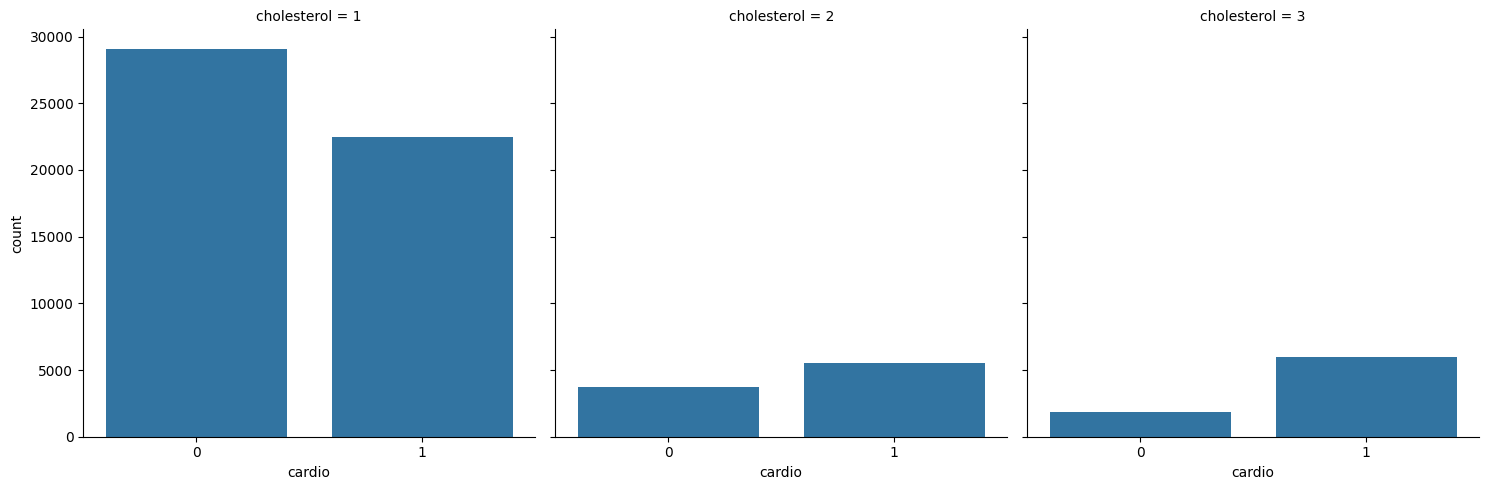

In [ ]:
sns.catplot(x='cardio', col='cholesterol', kind='count', data=df) #콜레스테롤 상태에 따라 심장병 유무

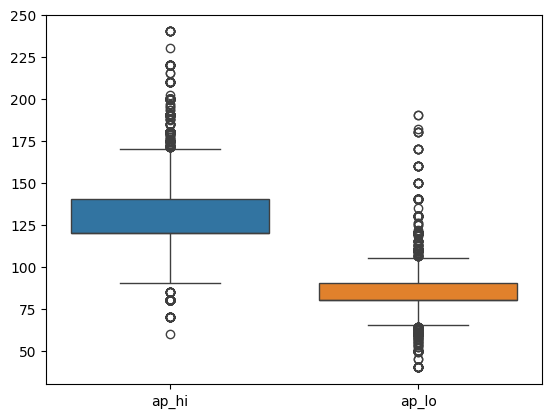

In [ ]:
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.show()

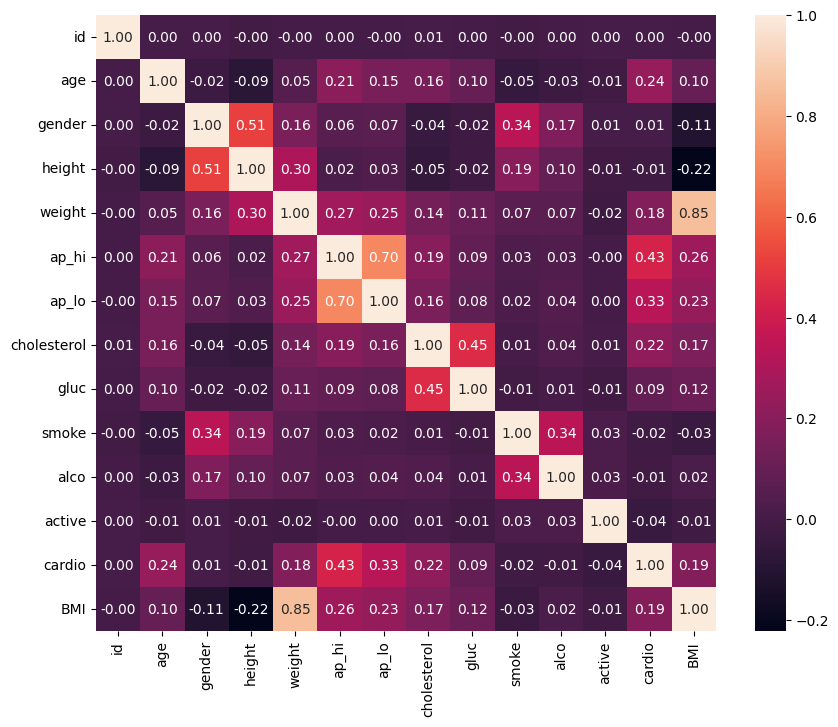

In [ ]:
plt.figure(figsize=(10, 8)) #correlation
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

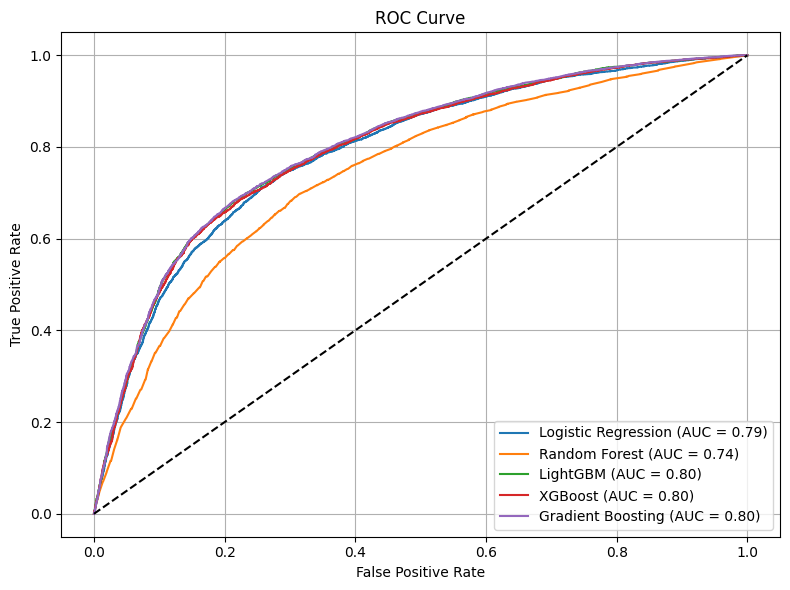

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 이미 학습된 모델들을 dictionary에 저장했다고 가정
trained_models = {
    'Logistic Regression': model_log,     # 예: model_log = LogisticRegression().fit(...)
    'Random Forest': model_rf,
    'LightGBM': model_lgb,
    'XGBoost': model_xgb,
    'Gradient Boosting': model_gb
}

# ROC Curve 시각화
plt.figure(figsize=(8, 6))

for name, model in trained_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # 클래스 1일 확률
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# 기준선 (무작위 예측)
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



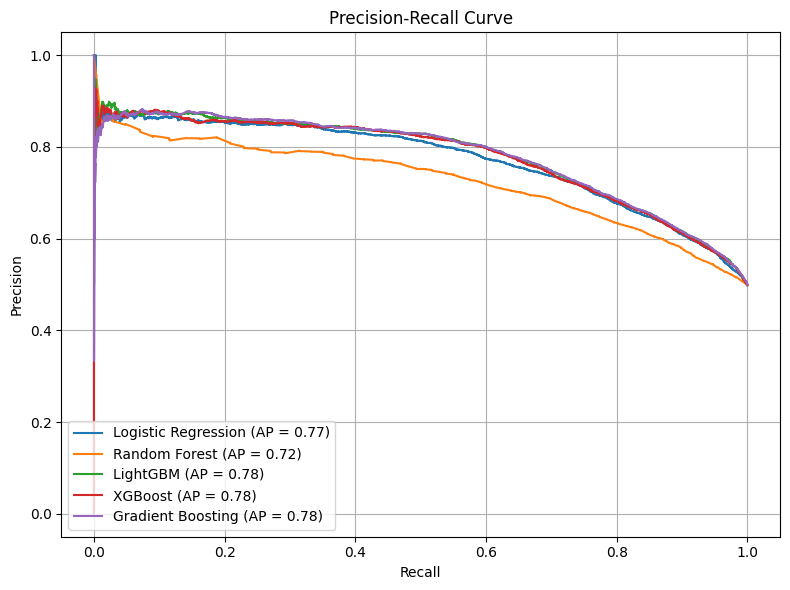

In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))

for name, model in trained_models.items():
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

# 그래프 설정
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


#6.전이학습
TabNet 모델로 전이학습 실행

AutoGluon: 딥러닝, GBM, RF 등 자동 스택킹 + 전이학습 포함/ 전이학습을 사용하는 모델 + 그렇지 않은 모델을 모두 앙상블해서 사용

In [ ]:
!pip install pytorch-tabnet

In [ ]:
# 1. 라이브러리 로딩
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# 2. heart.csv 불러오기 및 매핑
heart = pd.read_csv('/content/drive/MyDrive/heart.csv')
heart_mapped = heart[['age', 'sex', 'chol', 'trestbps', 'fbs', 'target']].copy() #fbs: 공복혈당
heart_mapped.columns = ['age', 'gender', 'cholesterol', 'ap_hi', 'gluc', 'cardio'] #gluc: 혈당 수치 등급

X_heart = heart_mapped.drop(columns=['cardio']).values
y_heart = heart_mapped['cardio'].values
Xh_train, Xh_val, yh_train, yh_val = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [ ]:
# 3. TabNet 사전학습
pretrained_model = TabNetClassifier(seed=42)
pretrained_model.fit(
    X_train=Xh_train, y_train=yh_train,
    eval_set=[(Xh_val, yh_val)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)
pretrained_model.save_model("/content/tabnet_heart_pretrained")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.72306 | val_0_accuracy: 0.6     |  0:00:00s
epoch 1  | loss: 0.62014 | val_0_accuracy: 0.50732 |  0:00:00s
epoch 2  | loss: 0.5986  | val_0_accuracy: 0.45854 |  0:00:00s
epoch 3  | loss: 0.56861 | val_0_accuracy: 0.49756 |  0:00:00s
epoch 4  | loss: 0.57421 | val_0_accuracy: 0.48293 |  0:00:00s
epoch 5  | loss: 0.55897 | val_0_accuracy: 0.5122  |  0:00:01s
epoch 6  | loss: 0.53711 | val_0_accuracy: 0.49756 |  0:00:01s
epoch 7  | loss: 0.51505 | val_0_accuracy: 0.49756 |  0:00:01s
epoch 8  | loss: 0.53147 | val_0_accuracy: 0.41951 |  0:00:02s
epoch 9  | loss: 0.5269  | val_0_accuracy: 0.37561 |  0:00:02s
epoch 10 | loss: 0.51945 | val_0_accuracy: 0.40488 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_accuracy = 0.6


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at /content/tabnet_heart_pretrained.zip


'/content/tabnet_heart_pretrained.zip'

In [ ]:
# 4. cardio 데이터 불러오기 및 매핑
cardio = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep=';')
cardio_mapped = cardio[['age', 'gender', 'cholesterol', 'ap_hi', 'gluc', 'cardio']].dropna()


X_cardio = cardio_mapped.drop(columns=['cardio']).values
y_cardio = cardio_mapped['cardio'].values
Xc_train, Xc_val, yc_train, yc_val = train_test_split(X_cardio, y_cardio, test_size=0.2, random_state=42)


In [ ]:
# 5. 사전학습된 모델 불러와서 전이학습
finetune_model = TabNetClassifier()
finetune_model.load_model("/content/tabnet_heart_pretrained.zip")

finetune_model.fit(
    X_train=Xc_train, y_train=yc_train,
    eval_set=[(Xc_val, yc_val)],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=5,
    batch_size=256,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.57346 | val_0_accuracy: 0.64893 |  0:00:11s
epoch 1  | loss: 0.55479 | val_0_accuracy: 0.6855  |  0:00:21s
epoch 2  | loss: 0.55236 | val_0_accuracy: 0.69543 |  0:00:32s
epoch 3  | loss: 0.5528  | val_0_accuracy: 0.66721 |  0:00:37s
epoch 4  | loss: 0.55347 | val_0_accuracy: 0.70314 |  0:00:44s
epoch 5  | loss: 0.55406 | val_0_accuracy: 0.68821 |  0:00:49s
epoch 6  | loss: 0.55321 | val_0_accuracy: 0.68129 |  0:00:55s
epoch 7  | loss: 0.55309 | val_0_accuracy: 0.68707 |  0:01:01s
epoch 8  | loss: 0.55099 | val_0_accuracy: 0.66921 |  0:01:08s
epoch 9  | loss: 0.54967 | val_0_accuracy: 0.68443 |  0:01:14s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_val_0_accuracy = 0.70314


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# 6. 성능 평가
preds = finetune_model.predict(Xc_val)
accuracy = accuracy_score(yc_val, preds)
print(f"전이학습 이후 정확도: {accuracy:.4f}")

전이학습 이후 정확도: 0.7031


In [ ]:
#1. AutoGluon 설치
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [ ]:
#2. 데이터 준비
from autogluon.tabular import TabularPredictor

# 혹시 모를 누락 제거
df = df.dropna()

# train/test 분리 (AutoGluon은 내부적으로도 가능하지만 명시적으로 해줄 수도 있어요)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
#3. 모델 학습
predictor = TabularPredictor(label='cardio', eval_metric='accuracy').fit(train_data=train_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20250731_131507"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.83 GB / 12.67 GB (85.4%)
Disk Space Avail:   64.46 GB / 107.72 GB (59.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU me

AutoGluon은 내부적으로:

Neural Net (딥러닝)

LightGBM

CatBoost

XGBoost

ExtraTrees 등

그리고 이들을 스태킹 + 앙상블까지 자동 수행합니다.

In [ ]:
#4. 성능 평가
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.731670,0.7496,accuracy,0.067052,0.021695,92.736043,0.067052,0.021695,92.736043,1,True,10
1,XGBoost,0.731597,0.7432,accuracy,0.041902,0.009555,1.005966,0.041902,0.009555,1.005966,1,True,9
2,LightGBM,0.731234,0.7428,accuracy,0.063753,0.034921,3.403773,0.063753,0.034921,3.403773,1,True,2
3,WeightedEnsemble_L2,0.731161,0.7516,accuracy,0.360346,0.083794,154.874627,0.003382,0.001487,0.203488,2,True,12
4,NeuralNetFastAI,0.729051,0.7500,accuracy,0.289911,0.060612,61.935096,0.289911,0.060612,61.935096,1,True,8
5,LightGBMLarge,0.728833,0.7436,accuracy,0.064011,0.025396,2.525492,0.064011,0.025396,2.525492,1,True,11
6,CatBoost,0.726724,0.7416,accuracy,0.049077,0.002048,1.624675,0.049077,0.002048,1.624675,1,True,5
7,LightGBMXT,0.725997,0.7408,accuracy,0.078506,0.028135,1.835880,0.078506,0.028135,1.835880,1,True,1
8,RandomForestGini,0.719232,0.7276,accuracy,2.546081,0.268248,46.322552,2.546081,0.268248,46.322552,1,True,3
9,ExtraTreesEntr,0.719086,0.7348,accuracy,2.230316,0.301052,15.233507,2.230316,0.301052,15.233507,1,True,7


WeightedEnsemble_L2	전체적으로 가장 균형 잡힌 성능 (test + val 기준 모두 안정적), 검증 정확도가 가장 높음 → 일반화 잘됨

#7.streamlit 적용

In [ ]:
import pickle

# 기존에 학습한 XGBoost 모델을 저장
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model_xgb, f)

#8.교수님 피드백
#####하이퍼 파라미터 튜닝할때 최적화
그리드 서치 튜닝으로
모델 정확도를 높이기


In [ ]:
# 파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 하이퍼파라미터 공간 정의
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 1.5, 2, 3]
}

# RandomizedSearchCV 설정
search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    scoring='f1',  # F1 score 기준 최적화
    cv=5,
    n_iter=20,       # 실험 횟수 (적절히 조절 가능)
    n_jobs=-1,
    random_state=42
)

# 학습
search.fit(X_train, y_train)

# 최적 모델로 예측
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 평가 출력
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Best Parameters:", search.best_params_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7227960430608088
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      6891
           1       0.70      0.78      0.74      6857

    accuracy                           0.72     13748
   macro avg       0.73      0.72      0.72     13748
weighted avg       0.73      0.72      0.72     13748

Best Parameters: {'scale_pos_weight': 1.5, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05}


RandomizedSearchCV는 오히려 성능이 떨어짐

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:42:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.733997672388711
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6891
           1       0.75      0.70      0.72      6857

    accuracy                           0.73     13748
   macro avg       0.74      0.73      0.73     13748
weighted avg       0.74      0.73      0.73     13748

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [ ]:
best_model.score(X_test, y_test)

0.733997672388711

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_best)
print("F1 Score:", f1)

F1 Score: 0.7240624764204331


In [73]:
#streamlit용 저장
import pickle

# GridSearchCV로 찾은 최적 모델
best_model = grid_search.best_estimator_

# 모델 저장
with open("xgb_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

데이터가 7만이면 굳이 전이학습 안해도 됨

개인별 개선 제안 이걸 하이라이트로
변수 중요도 뽑아서 위험도가 몇프로인데 그 이유는 이 변수가 어쩌고
feature importance 설명
개인별 개선 제안을 더 다양하게
생성형 ai랑 연결해 개선재안
9월 학술대회 내보자

한국 정보처리 학회-> 수상
홈페이지
9월 16일

정보보호학회